In [1]:
from gurobipy import *
from utils import (get_parameters, generate_mapping_names, generate_mapping_qualifications,
                   generate_qualifications_matrix, generate_working_days_matrix,
                   generate_working_days_per_qualification_matrix, generate_due_dates_matrix,
                   generate_gains_vect, generate_penalties_vect)
from display_utils import print_plannings
from lp_utils import (generate_variables_and_constraints, set_objective_and_solve,
                      add_epsilon_constraint, solve_epsilon_constraint, run_epsilon_constraint,
                     is_pareto_efficient,filter_pareto_front)

In [3]:
import json
with open('instances/instances_created/adjusted_job_length_horizon_16.json') as f:
    json_instance = json.load(f)
    f.close()

In [4]:
json_instance

{'horizon': 16,
 'qualifications': ['1', '2', '3', '4', '5'],
 'staff': [{'name': 'Consultant1',
   'qualifications': ['3', '5'],
   'vacations': []},
  {'name': 'Consultant2', 'qualifications': ['3'], 'vacations': []},
  {'name': 'Consultant3',
   'qualifications': ['5', '4', '1', '3'],
   'vacations': []},
  {'name': 'Consultant4', 'qualifications': ['2', '1'], 'vacations': []},
  {'name': 'Consultant5',
   'qualifications': ['1', '4', '5', '2', '3'],
   'vacations': []},
  {'name': 'Consultant6',
   'qualifications': ['5', '1', '3', '2', '4'],
   'vacations': []},
  {'name': 'Consultant7', 'qualifications': ['2'], 'vacations': []},
  {'name': 'Consultant8', 'qualifications': ['3', '2'], 'vacations': []}],
 'jobs': [{'name': 'Job1',
   'gain': 152,
   'due_date': 7,
   'daily_penalty': 78,
   'working_days_per_qualification': {'4': 8, '1': 6, '2': 6, '5': 7}},
  {'name': 'Job2',
   'gain': 135,
   'due_date': 12,
   'daily_penalty': 17,
   'working_days_per_qualification': {'3': 9, '

In [5]:
N,M,K,T = get_parameters(json_instance)

In [6]:
mapping_names = generate_mapping_names(json_instance)
mapping_qualif = generate_mapping_qualifications(json_instance)
qualifications_mat = generate_qualifications_matrix(json_instance,mapping_qualif,N,K)
working_days_mat = generate_working_days_matrix(json_instance,N,T)
wd_per_qual_mat = generate_working_days_per_qualification_matrix(json_instance, mapping_qualif, M, K)
due_dates_mat = generate_due_dates_matrix(json_instance, M, T)
gains_vect = generate_gains_vect(json_instance, M)
penalties_vect = generate_penalties_vect(json_instance, M)

In [7]:
m = generate_variables_and_constraints(N,M,K,T,qualifications_mat, working_days_mat, wd_per_qual_mat)
                

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-12


## Resolution du programme monobjectif maximisant le gain obtenu

In [8]:
obj1_1,obj2_1,obj3_1 = set_objective_and_solve(m,1,gains_vect,penalties_vect,due_dates_mat,M,T)

In [9]:
print("La valeur optimale de l'objectif de gain est {}".format(obj1_1))
print("Le nombre max de projet/pers et de durée max d'un projet sont alors {} et {}".format(obj2_1,obj3_1))
obj1_opti = obj1_1
print_plannings(N,M,K,T,mapping_names,working_days_mat,json_instance['qualifications'],m)

La valeur optimale de l'objectif de gain est 954
Le nombre max de projet/pers et de durée max d'un projet sont alors 9 et 12
planning de Consultant1 : 
jour 1 :  projet 16, compétence 5

jour 2 :  projet 16, compétence 5

jour 3 :  projet 21, compétence 5

jour 4 :  projet 18, compétence 5

jour 5 :  projet 21, compétence 5

jour 6 :  projet 18, compétence 5

jour 7 :  projet 21, compétence 5

jour 8 :  projet 5, compétence 3

jour 9 :  projet 18, compétence 5

jour 10 :  projet 11, compétence 3

jour 11 :  projet 19, compétence 5

jour 12 :  projet 18, compétence 5

jour 13 :  projet 18, compétence 5

jour 14 :  projet 8, compétence 5

jour 15 :  projet 4, compétence 3

jour 16 :  projet 19, compétence 5

planning de Consultant2 : 
jour 1 :  projet 16, compétence 3

jour 2 :  projet 16, compétence 3

jour 3 :  projet 11, compétence 3

jour 4 :  projet 5, compétence 3

jour 5 :  projet 2, compétence 3

jour 6 :  projet 21, compétence 3

jour 7 :  projet 21, compétence 3

jour 8 :  proj

## Resolution du programme monobjectif minimisant le nombre maximal de projets affectés à un membre du staff


In [10]:
obj1_2,obj2_2,obj3_2 = set_objective_and_solve(m,2,gains_vect,penalties_vect,due_dates_mat,M,T)

In [11]:
print("La valeur optimale de l'objectif de minimisation du nombre de projets/pers est {}".format(obj2_2))
print("Le gain et la durée max d'un projet sont alors {} et {}".format(obj1_2,obj3_2))
obj2_opti = obj2_2
print_plannings(N,M,K,T,mapping_names,working_days_mat,json_instance['qualifications'],m)

La valeur optimale de l'objectif de minimisation du nombre de projets/pers est 0
Le gain et la durée max d'un projet sont alors 0 et 0
planning de Consultant1 : 
jour 1 :  
jour 2 :  
jour 3 :  
jour 4 :  
jour 5 :  
jour 6 :  
jour 7 :  
jour 8 :  
jour 9 :  
jour 10 :  
jour 11 :  
jour 12 :  
jour 13 :  
jour 14 :  
jour 15 :  
jour 16 :  
planning de Consultant2 : 
jour 1 :  
jour 2 :  
jour 3 :  
jour 4 :  
jour 5 :  
jour 6 :  
jour 7 :  
jour 8 :  
jour 9 :  
jour 10 :  
jour 11 :  
jour 12 :  
jour 13 :  
jour 14 :  
jour 15 :  
jour 16 :  
planning de Consultant3 : 
jour 1 :  
jour 2 :  
jour 3 :  
jour 4 :  
jour 5 :  
jour 6 :  
jour 7 :  
jour 8 :  
jour 9 :  
jour 10 :  
jour 11 :  
jour 12 :  
jour 13 :  
jour 14 :  
jour 15 :  
jour 16 :  
planning de Consultant4 : 
jour 1 :  
jour 2 :  
jour 3 :  
jour 4 :  
jour 5 :  
jour 6 :  
jour 7 :  
jour 8 :  
jour 9 :  
jour 10 :  
jour 11 :  
jour 12 :  
jour 13 :  
jour 14 :  
jour 15 :  
jour 16 :  
planning de Consultant5 :

## Resolution du programme monobjectif minimisant la durée maximale d'un projet

In [12]:
obj1_3,obj2_3,obj3_3 = set_objective_and_solve(m,3,gains_vect,penalties_vect,due_dates_mat,M,T)

In [13]:
print("La valeur optimale de l'objectif de minimisation de la durée des projets est {}".format(obj3_3))
print("Le gain et le nombre max de projets/pers sont alors {} et {}".format(obj1_3,obj2_3))
obj3_opti = obj2_3
print_plannings(N,M,K,T,mapping_names,working_days_mat,json_instance['qualifications'],m)

La valeur optimale de l'objectif de minimisation de la durée des projets est 0
Le gain et le nombre max de projets/pers sont alors 0 et 0
planning de Consultant1 : 
jour 1 :  
jour 2 :  
jour 3 :  
jour 4 :  
jour 5 :  
jour 6 :  
jour 7 :  
jour 8 :  
jour 9 :  
jour 10 :  
jour 11 :  
jour 12 :  
jour 13 :  
jour 14 :  
jour 15 :  
jour 16 :  
planning de Consultant2 : 
jour 1 :  
jour 2 :  
jour 3 :  
jour 4 :  
jour 5 :  
jour 6 :  
jour 7 :  
jour 8 :  
jour 9 :  
jour 10 :  
jour 11 :  
jour 12 :  
jour 13 :  
jour 14 :  
jour 15 :  
jour 16 :  
planning de Consultant3 : 
jour 1 :  
jour 2 :  
jour 3 :  
jour 4 :  
jour 5 :  
jour 6 :  
jour 7 :  
jour 8 :  
jour 9 :  
jour 10 :  
jour 11 :  
jour 12 :  
jour 13 :  
jour 14 :  
jour 15 :  
jour 16 :  
planning de Consultant4 : 
jour 1 :  
jour 2 :  
jour 3 :  
jour 4 :  
jour 5 :  
jour 6 :  
jour 7 :  
jour 8 :  
jour 9 :  
jour 10 :  
jour 11 :  
jour 12 :  
jour 13 :  
jour 14 :  
jour 15 :  
jour 16 :  
planning de Consultant

## Génération des solutions efficaces (surface de pareto)

In [14]:
optimal_sol = obj1_opti, obj2_opti, obj3_opti
optimal_sol

(954, 0, 0)

In [15]:
nadir_sol = (0,M,T)
nadir_sol

(0, 21, 16)

In [16]:
pareto_surface_non_filtered, epsilon_constraints = run_epsilon_constraint(m,optimal_sol,nadir_sol,gains_vect,penalties_vect,due_dates_mat,M,T)

step with eps2 = 21 and eps3 = 16
solution found in 20.33864164352417 seconds
solution found :  [-954, 21, 8]
step with eps2 = 21 and eps3 = 7
solution found in 25.104540824890137 seconds
solution found :  [-954, 21, 5]
step with eps2 = 21 and eps3 = 4
solution found in 32.034990549087524 seconds
solution found :  [-954, 21, 3]
step with eps2 = 21 and eps3 = 2
solution found in 120.18686962127686 seconds
solution found :  [-911, 21, 2]
step with eps2 = 21 and eps3 = 1
solution found in 72.55113983154297 seconds
solution found :  [-634, 21, 1]
step with eps2 = 21 and eps3 = 0
solution found in 1.9275057315826416 seconds
solution found :  [0, 21, 0]
step with eps2 = 20 and eps3 = 16
solution found in 20.772823810577393 seconds
solution found :  [-954, 20, 7]
step with eps2 = 20 and eps3 = 6
solution found in 29.57514786720276 seconds
solution found :  [-954, 20, 5]
step with eps2 = 20 and eps3 = 4
solution found in 42.291746377944946 seconds
solution found :  [-954, 20, 4]
step with eps2

In [17]:
mask = is_pareto_efficient(pareto_surface_non_filtered)
pareto_surface = filter_pareto_front(pareto_surface_non_filtered,mask)
epsilon_cstr = epsilon_constraints[mask]

In [18]:
pareto_surface

array([[937,  10,   2],
       [933,   8,   2],
       [634,   8,   1],
       [954,   7,   3],
       [920,   7,   2],
       [620,   7,   1],
       [954,   6,   4],
       [920,   6,   3],
       [808,   6,   2],
       [594,   6,   1],
       [954,   5,   5],
       [876,   5,   4],
       [816,   5,   3],
       [747,   5,   2],
       [545,   5,   1],
       [921,   4,   8],
       [920,   4,   7],
       [876,   4,   6],
       [856,   4,   5],
       [805,   4,   4],
       [756,   4,   3],
       [632,   4,   2],
       [435,   4,   1],
       [880,   3,  11],
       [844,   3,   8],
       [840,   3,   6],
       [779,   3,   5],
       [657,   3,   4],
       [523,   3,   3],
       [487,   3,   2],
       [364,   3,   1],
       [789,   2,  14],
       [769,   2,   9],
       [695,   2,   8],
       [679,   2,   7],
       [677,   2,   6],
       [657,   2,   5],
       [505,   2,   4],
       [422,   2,   3],
       [321,   2,   2],
       [198,   2,   1],
       [528,   1

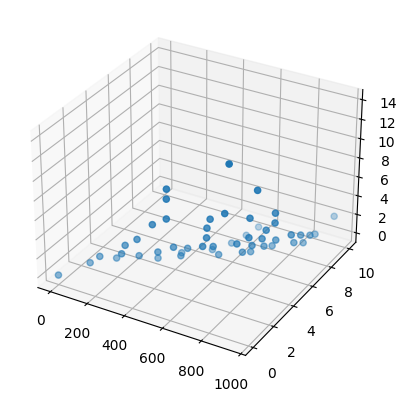

In [20]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

x_data = [t[0] for t in pareto_surface]
y_data = [t[1] for t in pareto_surface]
z_data = [t[2] for t in pareto_surface]
ax.scatter3D(x_data,y_data,z_data)

## Inférence des préférences

Définissons $\lambda$=0.75, w=[0.5, 0.25, 0.25]. Répartissons les exemples en 3 classes en fonction des relations de dominance obtenues et essayons de voir si notre système est capable de retrouver les classes des exemples manquants si on ne lui fournit qu'une partie des exemples classifiés

In [21]:
from preferences_utils import infer_classes, solve_lp_preferences

In [22]:
import numpy as np
lam = 0.75
w = np.array([0.5, 0.25, 0.25])

sols_to_compare = pareto_surface.copy()
sols_to_compare[:,1] *= -1
sols_to_compare[:,2] *= -1

for i in range(sols_to_compare.shape[0]) :
    for j in range(sols_to_compare.shape[0]):
        if i != j :
            if np.sum([w[k] for k in range(3) if sols_to_compare[i][k] >= sols_to_compare[j][k] ]) >= lam :
                print('s{} domine s{}'.format(i+1,j+1))
            else : 
                print('s{} ne domine pas s{}'.format(i+1,j+1))
    print('======================')
        
    

s1 domine s2
s1 ne domine pas s3
s1 ne domine pas s4
s1 domine s5
s1 ne domine pas s6
s1 ne domine pas s7
s1 domine s8
s1 domine s9
s1 ne domine pas s10
s1 ne domine pas s11
s1 domine s12
s1 domine s13
s1 domine s14
s1 ne domine pas s15
s1 domine s16
s1 domine s17
s1 domine s18
s1 domine s19
s1 domine s20
s1 domine s21
s1 domine s22
s1 ne domine pas s23
s1 domine s24
s1 domine s25
s1 domine s26
s1 domine s27
s1 domine s28
s1 domine s29
s1 domine s30
s1 ne domine pas s31
s1 domine s32
s1 domine s33
s1 domine s34
s1 domine s35
s1 domine s36
s1 domine s37
s1 domine s38
s1 domine s39
s1 domine s40
s1 ne domine pas s41
s1 domine s42
s1 domine s43
s1 domine s44
s1 domine s45
s1 domine s46
s1 domine s47
s1 domine s48
s1 domine s49
s1 ne domine pas s50
s1 ne domine pas s51
s2 ne domine pas s1
s2 domine s3
s2 ne domine pas s4
s2 domine s5
s2 ne domine pas s6
s2 ne domine pas s7
s2 domine s8
s2 domine s9
s2 ne domine pas s10
s2 ne domine pas s11
s2 domine s12
s2 domine s13
s2 domine s14
s2 ne do

On choisit les affectations suivantes :

C1 =  {s8, s9, s10, s6}

C2 = {s5, s7, s3}

C3 = {s1,s2, s4}

Essayons maintenant de fournir quelques exemples par classe à notre programme pour voir comment il classifie les exemples restants

In [23]:
inacceptable = sols_to_compare[[8,9,5]]
correct = sols_to_compare[[2,4]]
satisfaisant = sols_to_compare[[0,1]]

In [71]:
infer_classes(inacceptable, correct, satisfaisant,sols_to_compare[[3,6,7]])

(0.500001, [0.5, 0.0, 0.5])
(0.500001, [0.5, 0.0, 0.5])
(0.5, [1.0, 0.0, 0.0])
(0.5, [1.0, 0.0, 0.0])
(0.5, [1.0, 0.0, 0.0])
(0.500001, [0.5, 0.5, 0.0])
(0.5, [1.0, 0.0, 0.0])
(0.500001, [0.5, 0.5, 0.0])
(0.500001, [0.5, 0.5, 0.0])


{(65, -2, -2): ['inacceptable', 'correct', 'satisfaisant'],
 (42, -1, -2): ['inacceptable', 'correct', 'satisfaisant'],
 (30, -1, -1): ['inacceptable', 'correct', 'satisfaisant']}

Sur la toy instance qui ne comporte que 10 solutions efficaces, il est quasiment toujours possible de trouver un jeu de poids respectant les classifications du décideur pour lequel un élément non classifié appartient à une classe donnée.
On n'a pas assez de contraintes

In [72]:
inacceptable = sols_to_compare[[5,7,8,9]]
correct = sols_to_compare[[2,4,6]]
satisfaisant = sols_to_compare[[0,1,3]]

In [73]:
solve_lp_preferences(inacceptable,correct,satisfaisant)

(0.5, [1.0, 0.0, 0.0])

Si on lui passe toutes les instances classifiées, notre programme trouve $\lambda$=0.5, w=[1.0, 0, 0].
Cela n'est pas étonnant puisque dans la configuration que nous avons choisie, la première composante des solutions satisfaisantes dans l'espace des critères est toujours plus grande que la première composante des solutions correctes. De plus, la première composante des solutions correctes dans l'espace des critères est toujours plus grande que la première composante des solutions inacceptables dans cet espace.